An attempt at running experiments with the spherical rho theta projection. We are pretendign that the real smoke and the false alarm are two sources. 

In [1]:
import numpy as np
import SDOptimizer as SDOmodule
from SDOptimizer.SDOptimizer import SDOptimizer
import matplotlib as plt
#import importlib

#importlib.reload(SDOmodule)
plt.rcParams["figure.figsize"] = (10, 7)

SDO = SDOptimizer()

Define constants for the rest of the program.

In [2]:
SMOKE_DATA_DIR = "data/smoke_data_full3D" # this data was emailed around
FALSE_ALARM_DATA_DIR = "data/bike_data_full3D"
INFEASIBLE = [(3, -2, 4, -1)] # The infeasible region
SPHERICAL_PROJECTION = True
ALARM_THRESHOLD = 4e-20 # This is MUCH lower than the NASA-specified value of 0.5e-6

# constants for the 
NUM_DETECTORS = 2
NUM_ITERATIONS = 20

Here we take the data which was in 3D and map it into a spherical projection. This is done by normalizing each axis to lie between $[-1, 1]$ and then computing the spherical coordinates of each point. The radius is then discarded and the $\phi$, $\rho$ projection is returned. If you would like to visualize this data in 3D, run `python vis_3D.py` in the terminal.

About to visualize the smoke sources


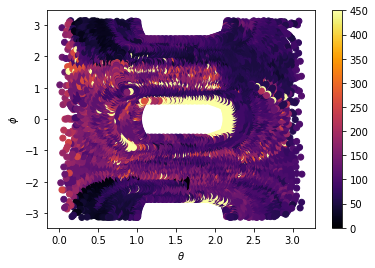

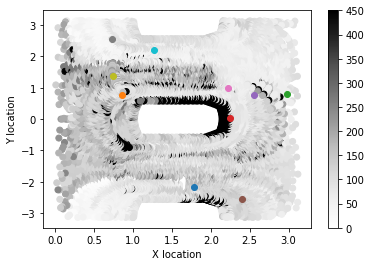

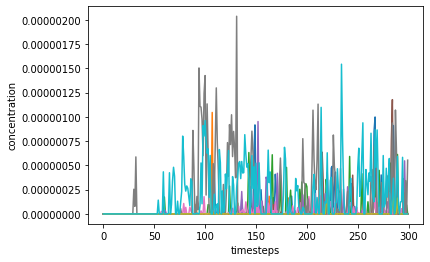

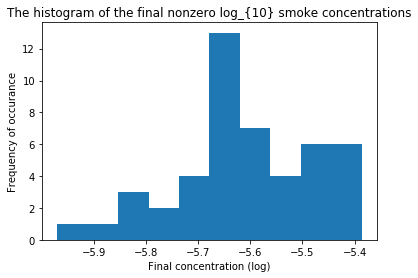

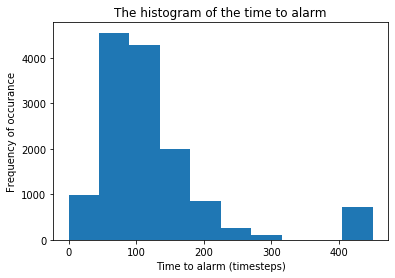

About to visualize the false alarms


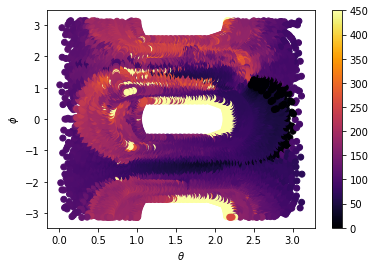

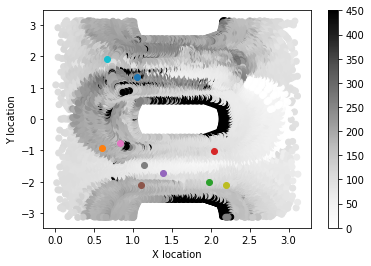

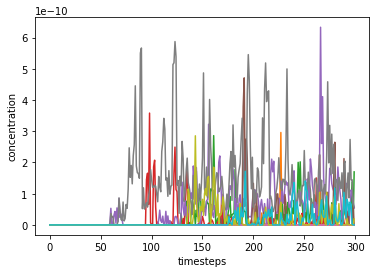

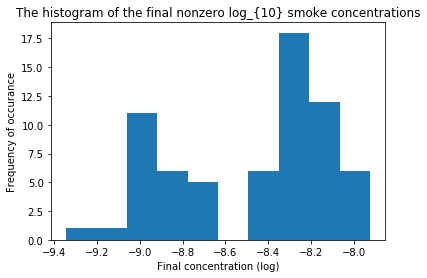

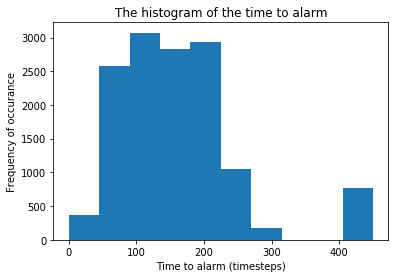

In [3]:
# load the smoke source data
SDO.load_timestep_directory(SMOKE_DATA_DIR)
print("About to visualize the smoke sources")
# get the time to alarm from the smoke source data
source1 = SDO.get_time_to_alarm(False, False,
                                spherical_projection=SPHERICAL_PROJECTION,
                                alarm_threshold=ALARM_THRESHOLD,
                                visualize=True, write_figs=True) # the default value of flip is false, so this is simply included for clarity

# Get the false alarm data
SDO.load_timestep_directory(FALSE_ALARM_DATA_DIR)
print("About to visualize the false alarms")
# get the time to alarm for the false alarm source
source2 = SDO.get_time_to_alarm(False, False,
                                spherical_projection=SPHERICAL_PROJECTION,
                                alarm_threshold=ALARM_THRESHOLD,
                                visualize=True, write_figs=False) # the default value of flip is false, so this is simply included for clarity

# concatenate the two together
smoke_sources = [source1, source2]

The next three cells demonstrate the optimization routine with three, two, and one detectors. The first return plot is the solution quality versus optimization iterations. The next is a visualization of the solution quality when one detector is moved.

/home/david/anaconda3/lib/python3.7/site-packages/scipy/optimize/_differentialevolution.py:773: RuntimeWarning: divide by zero encountered in double_scalars
  convergence=self.tol / convergence) is True):


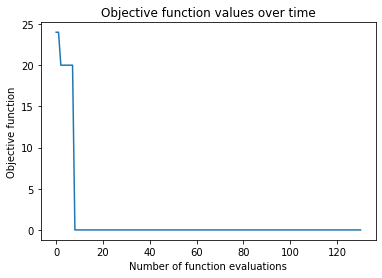

<Figure size 432x288 with 0 Axes>

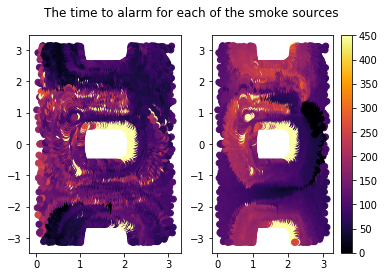

<Figure size 432x288 with 0 Axes>

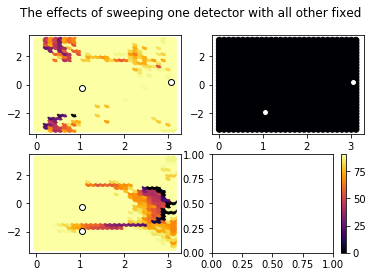

The bounds are now [(0.010540651564376273, 3.1192043970023673), (-3.141494847402163, 3.141592653589793), (0.010540651564376273, 3.1192043970023673), (-3.141494847402163, 3.141592653589793), (0.010540651564376273, 3.1192043970023673), (-3.141494847402163, 3.141592653589793)]
The locations are: (1.048, -1.947), (1.043, -0.248), (3.059, 0.161), 
the result of the optimization is:
      fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 11887
     nit: 131
 success: True
    vals: [24.0, 24.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [4]:
description = SDO.optimize(smoke_sources, num_detectors=3, genetic=True, multiobjective=False, visualize=True, type="worst_case")
print("the result of the optimization is:\n {}".format(description))

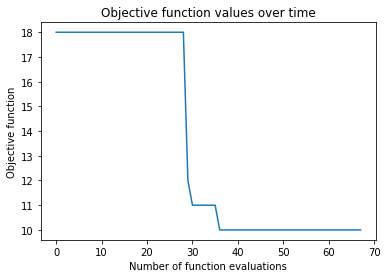

<Figure size 432x288 with 0 Axes>

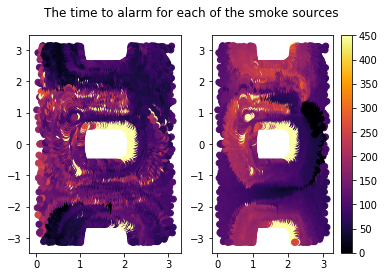

<Figure size 432x288 with 0 Axes>

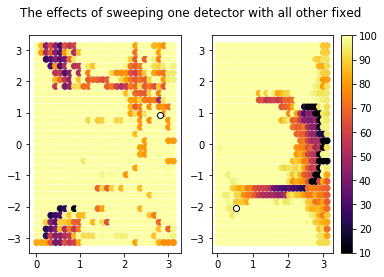

The bounds are now [(0.010540651564376273, 3.1192043970023673), (-3.141494847402163, 3.141592653589793), (0.010540651564376273, 3.1192043970023673), (-3.141494847402163, 3.141592653589793)]
The locations are: (0.527, -2.044), (2.816, 0.923), 
the result of the optimization is:
      fun: 9.999999999999998
 message: 'Optimization terminated successfully.'
    nfev: 4145
     nit: 68
 success: True
    vals: [18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.999999999999998, 9.999999999999998, 9.999999999999998, 9.999999999999998, 9.999999999999998, 9.999999999999998, 9.999999999999998, 9.999999999999998, 9.999999999999998, 9.999999999999998, 9.999999999999998, 9.999999999999998, 9.999999999999998, 9.999999999999998, 9.999999999

In [5]:
# running with two detectors
description = SDO.optimize(smoke_sources, num_detectors=2, genetic=True)
print("the result of the optimization is:\n {}".format(description))

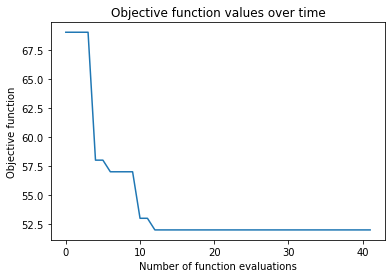

<Figure size 432x288 with 0 Axes>

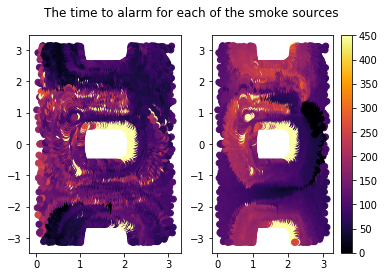

<Figure size 432x288 with 0 Axes>

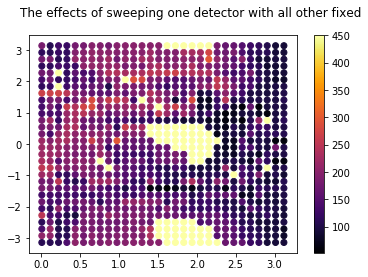

The bounds are now [(0.010540651564376273, 3.1192043970023673), (-3.141494847402163, 3.141592653589793)]
The locations are: (2.472, 1.292), 
the result of the optimization is:
      fun: 51.99999999999999
 message: 'Optimization terminated successfully.'
    nfev: 1293
     nit: 42
 success: True
    vals: [69.0, 69.0, 69.0, 69.0, 58.0, 58.0, 57.0, 57.0, 57.0, 57.0, 53.0, 53.0, 52.00000000000001, 52.00000000000001, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 51.99999999999999, 51.99999999999999, 51.99999999999999, 51.99999999999999, 51.99999999999999, 51.99999999999999, 51.99999999999999, 51.99999999999999]
       x: array([2.47156791, 1.29184966])


In [6]:
# running with one detector
description = SDO.optimize(smoke_sources, num_detectors=1, genetic=True)
print("the result of the optimization is:\n {}".format(description))

Here we look at the number of detectors versus solution quality. 

min x : 0.010540651564376273, max x : 3.1192043970023673, min y : -3.141494847402163, max y : 3.141592653589793


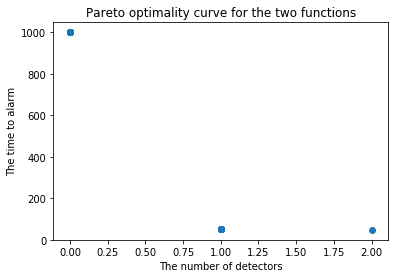

the result of the optimization is:


/home/david/dev/SmokeDetectorOptimization/SDOptimizer/SDOptimizer.py:855: UserWarning: Can't visualize the objective values for a multiobjective run
  UserWarning)


In [7]:
description = SDO.optimize(smoke_sources, num_detectors=3, genetic=True,
                           multiobjective=True, multiobjective_type="counting",
                           visualize=True, type="worst_case")

print("the result of the optimization is:\n {}".format(description))

Here we look at the competeting objectives between alarming quickly and not triggering the false alarm. 

min x : 0.010540651564376273, max x : 3.1192043970023673, min y : -3.141494847402163, max y : 3.141592653589793


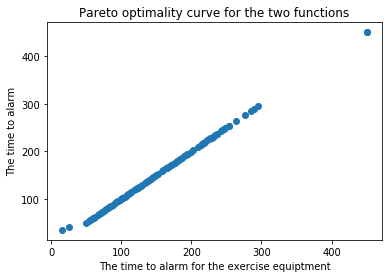

the result of the optimization is:


In [8]:
description = SDO.optimize(smoke_sources[0:],
                           num_detectors=3,
                           genetic=True, multiobjective=True,
                           multiobjective_type="competing_function",
                           bad_sources=smoke_sources[1:], visualize=True,
                           type="worst_case")

print("the result of the optimization is:\n {}".format(description))

Do some performance evalution

100%|██████████| 20/20 [07:36<00:00, 22.84s/it]


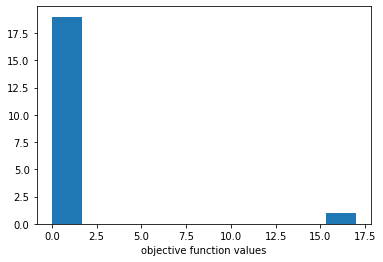

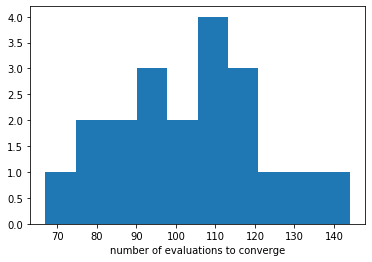

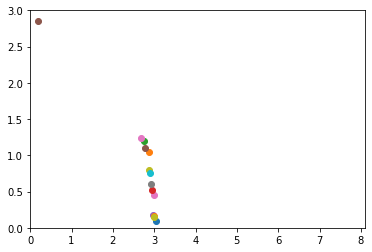

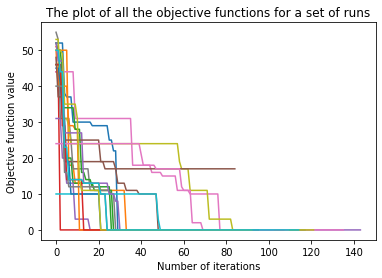

In [9]:
vals, locs, iterations, func_values = SDO.evaluate_optimization(smoke_sources,
                                                                num_detectors=NUM_DETECTORS,
                                                                genetic=True,
                                                                num_iterations=NUM_ITERATIONS)